In [177]:
import tensorflow as tf

In [178]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


2022-02-21 13:58:07.930397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 13:58:07.930840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-02-21 13:58:07.930917: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-21 13:58:07.930968: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-21 13:58:07.931004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-21 13:58:07.931042: I tensorflow/stream_execut

In [179]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1070


In [180]:
# import the training data into df 
df = pd.read_csv('CSVFiles/training-data.csv')
df.head()

,Unnamed: 0,Date,text,Sentiment
0,0,2019-05-27,@tippin_me @karozagorus I give 5 satoshis to e...,Positive
1,1,2019-05-27,@hitbtc @bkargili Attention hit btc does scam ...,Positive
2,2,2019-05-27,BTC(ビットコイン)が95万円超えてますやん… https://t.co/uzXGkzKDcI,Positive
3,3,2019-05-27,@CryptoGainz1 Yep https://t.co/TrpbxApU3H,Positive
4,4,2019-05-27,"@Kexkey @hodlwallet We’ll miss you, but we won...",Positive


In [181]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Text(0.5, 0, 'Sentiment Score')

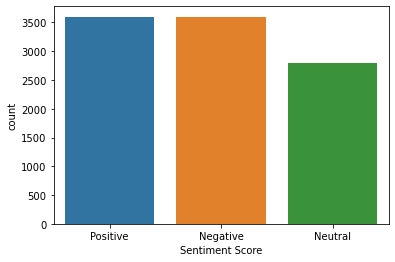

In [182]:
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')

In [183]:
# install hugging face library to use their transformers package 
!pip install huggingface

In [184]:
print('Number of training sentences: {:,}\n'.format(df.shape[0])) # we have 10,006 total sentences 

Number of training sentences: 10,006



In [187]:
df = df.replace({'Sentiment': {'Negative':'0', 'Neutral':'1', 'Positive':'2'}})

In [67]:
# !pip install transformers
# now we want to format our data so that VERT can use it for training 
from transformers import BertTokenizer 

# load the BERT tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [68]:
# some sample output 
print(' Original: ', tweets[0])
print('Tokenized: ', tokenizer.tokenize(tweets[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[0])))

 Original:  @tippin_me @karozagorus I give 5 satoshis to everyone for free and without any conditions. 

So anyone can instantly start using and learning Bitcoin without any initial investment.🎉

#Bitcoin #MassAdoption #LightningNetwork
Tokenized:  ['@', 'tip', '##pin', '_', 'me', '@', 'ka', '##ro', '##za', '##gor', '##us', 'i', 'give', '5', 'sato', '##shi', '##s', 'to', 'everyone', 'for', 'free', 'and', 'without', 'any', 'conditions', '.', 'so', 'anyone', 'can', 'instantly', 'start', 'using', 'and', 'learning', 'bit', '##co', '##in', 'without', 'any', 'initial', 'investment', '.', '[UNK]', '#', 'bit', '##co', '##in', '#', 'mass', '##ado', '##ption', '#', 'lightning', '##net', '##work']
Token IDs:  [1030, 5955, 8091, 1035, 2033, 1030, 10556, 3217, 4143, 20255, 2271, 1045, 2507, 1019, 20251, 6182, 2015, 2000, 3071, 2005, 2489, 1998, 2302, 2151, 3785, 1012, 2061, 3087, 2064, 6880, 2707, 2478, 1998, 4083, 2978, 3597, 2378, 2302, 2151, 3988, 5211, 1012, 100, 1001, 2978, 3597, 2378, 1001, 3

In [101]:
# some regex to clean the data before passing it to BERT tokenizer  
import re 
df_new = df.replace(to_replace='https?:\/\/\S+', value='', regex=True) # remove https urls 
df_new = df.replace(to_replace="www\.[a-z]?\.?(com)+|[a-z]+\.(com)", value='', regex=True) # remove www urls 
df_new = df.replace(to_replace="\[video\]", value='', regex=True) # remove videos that got replaced with [video]
df_new = df.replace(to_replace='{link}', value='', regex=True) # remove links 
df_new = df.replace(to_replace='&[a-z]+;', value='', regex=True) # remove HTML embedded characters
df_new = df.replace(to_replace='@[^ ]+', value='', regex=True) # remove @usernames 

In [102]:
df_new.head()

,Unnamed: 0,Date,text,Sentiment
0,0,2019-05-27,I give 5 satoshis to everyone for free and w...,Positive
1,1,2019-05-27,Attention hit btc does scam with me and not ...,Positive
2,2,2019-05-27,BTC(ビットコイン)が95万円超えてますやん… https://t.co/uzXGkzKDcI,Positive
3,3,2019-05-27,Yep https://t.co/TrpbxApU3H,Positive
4,4,2019-05-27,"We’ll miss you, but we won’t let our ideolog...",Positive


In [103]:
df = df_new 

In [104]:
df 

,Unnamed: 0,Date,text,Sentiment
0,0,2019-05-27,I give 5 satoshis to everyone for free and w...,Positive
1,1,2019-05-27,Attention hit btc does scam with me and not ...,Positive
2,2,2019-05-27,BTC(ビットコイン)が95万円超えてますやん… https://t.co/uzXGkzKDcI,Positive
3,3,2019-05-27,Yep https://t.co/TrpbxApU3H,Positive
4,4,2019-05-27,"We’ll miss you, but we won’t let our ideolog...",Positive
...,...,...,...,...
10001,9995,NaN,Yes - the term colored coin comes from the ...,Neutral
10002,9996,NaN,0 to 50% – Time to Pay Crypto Taxes in the Eur...,Neutral
10003,9997,NaN,RT Chinese Exchange Bitasia Now Supports 0-Co...,Neutral
10004,9998,NaN,Nice💰 https://t.co/76hs0wzbXA,Neutral


In [121]:
# get lists of tweets and their sentiment labels 
tweets = df.text.values
labels = df.Sentiment.values 

In [122]:
max_len = 0 

for i in range(len(tweets)):
    # tokenize the text and add `[CLS]` and `[SEP]` tokens 
    input_ids = tokenizer.encode(str(tweets[i]), add_special_tokens=True)
    
    #update max sentence length
    max_len = max(max_len, len(input_ids))
    
print('max sentence length: ', max_len)

max sentence length:  235


In [124]:
# we will set max_len to 235 
# now we can perform tokenization 
input_ids = [] 
attention_masks = [] 

for i in range(len(tweets)):
    # we call 'encode_plus' which will 
    # (1) tokenize the sentence 
    # (2) prepend `[CLS]` and append `[SEP]`
    # (3) map tokens to their ids 
    # (4) pad or truncate the sentence to 'max_length'
    # (5) create attention masks for `[PAD]` tokens 
    encoded_dict = tokenizer.encode_plus(str(tweets[i]), add_special_tokens=True,
                                        max_length=100,
                                        pad_to_max_length=True,
                                        return_attention_mask=True,
                                        return_tensors='pt')
    # adds encoded sentence to the list 
    input_ids.append(encoded_dict['input_ids'])
    
    # add the attention mask
    attention_masks.append(encoded_dict['attention_mask'])
    
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.